In [1]:
# 導入必要的程式庫
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 取得資料集
df = sns.load_dataset('titanic')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [3]:
df.head(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


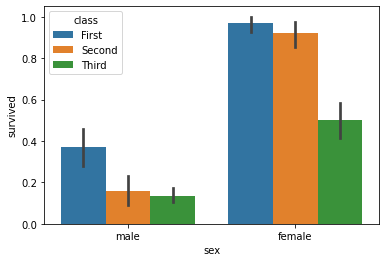

In [4]:
# 將每個艙等中男性和女性的平均存活率用長形圖可視化

sns.barplot(x = "sex", y = "survived",hue="class", data = df)
plt.show()


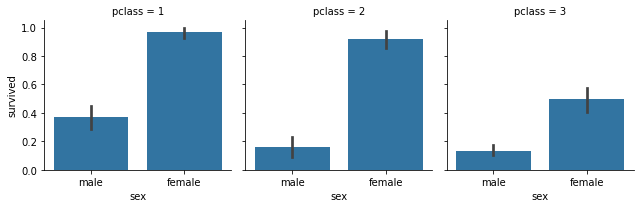

In [5]:
# 瞭解在各艙等不同性別的存活率

g = sns.FacetGrid(df,col="pclass")
g.map(sns.barplot,"sex","survived",order=["male", "female"])


In [6]:
# 先檢視各艙位存活人數，此時可以使用groupby函數進行分類，
# 其中 survived＝1表示存活，survived＝0表示死亡，將survived加總即為各艙等生存人數。

# df.groupby('pclass').survived.sum()

#加上性別
survived=df.groupby(['class','sex']).survived.sum()
survived
# survived.plot(kind='bar')

class   sex   
First   female    91
        male      45
Second  female    70
        male      17
Third   female    72
        male      47
Name: survived, dtype: int64

In [7]:
# 使用pd.crosstab函數繪製交叉表，交叉表可以很直觀的依據艙位等級及性別來查看存活人數及死亡人數。
# 繪製堆疊條形圖，x軸代表依據艙等分成男性及女性，y軸代表人數，其中藍色代表死亡人數，橘色代表存活人數。
survived_counts = pd.crosstab([df.pclass, df.sex],df.survived)
survived_counts 

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

<function matplotlib.pyplot.show(close=None, block=None)>

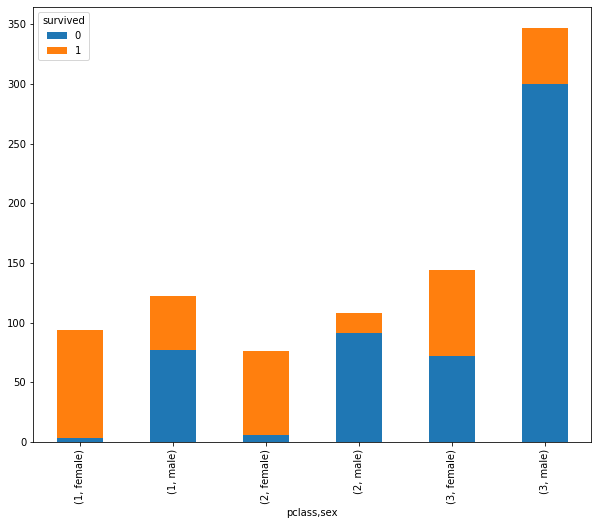

In [8]:
#使用survived_counts.plot做對照組
survived_counts.plot(kind="bar",stacked=True,figsize=(10,8))
plt.show

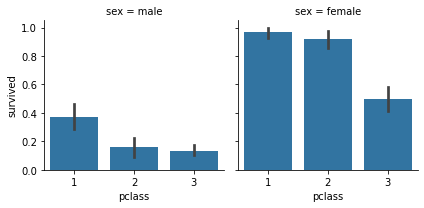

In [9]:
# 瞭解不同性別在各艙等的存活率
h = sns.FacetGrid(df,col="sex")
h.map(sns.barplot,"pclass","survived",order=[1, 2,3])

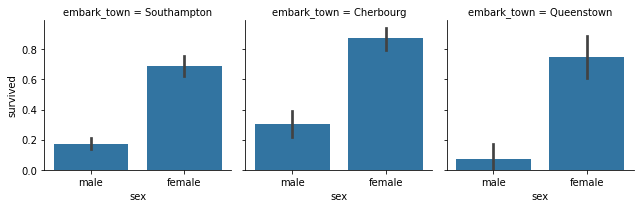

In [10]:
#可以嘗試其他的參數對照組合
#不同城市登船的男女存活率比較
i = sns.FacetGrid(df,col="embark_town")
i.map(sns.barplot,"sex","survived",order=["male","female"])

In [11]:
#不同城市登船的男女存活狀況與艙位關係
try01=pd.crosstab([df.embark_town, df.pclass,df.sex],df.survived)
print(try01)

#不同城市登船的男女倖存數量與艙位關係
try02=df.groupby(["embark_town","pclass","sex"]).survived.sum()
print(try02)

survived                     0   1
embark_town pclass sex            
Cherbourg   1      female    1  42
                   male     25  17
            2      female    0   7
                   male      8   2
            3      female    8  15
                   male     33  10
Queenstown  1      female    0   1
                   male      1   0
            2      female    0   2
                   male      1   0
            3      female    9  24
                   male     36   3
Southampton 1      female    2  46
                   male     51  28
            2      female    6  61
                   male     82  15
            3      female   55  33
                   male    231  34
embark_town  pclass  sex   
Cherbourg    1       female    42
                     male      17
             2       female     7
                     male       2
             3       female    15
                     male      10
Queenstown   1       female     1
                     male       0
